# Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime

In [3]:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls
datafile = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(datafile, sheet_name='Average price', index_col= None, parse_date=True)

In [4]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)

In [5]:
# Allows me to view al columns and their data-types 
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            309 non-null    datetime64[ns]
 1   City of London        310 non-null    object        
 2   Barking & Dagenham    310 non-null    object        
 3   Barnet                310 non-null    object        
 4   Bexley                310 non-null    object        
 5   Brent                 310 non-null    object        
 6   Bromley               310 non-null    object        
 7   Camden                310 non-null    object        
 8   Croydon               310 non-null    object        
 9   Ealing                310 non-null    object        
 10  Enfield               310 non-null    object        
 11  Greenwich             310 non-null    object        
 12  Hackney               310 non-null    object        
 13  Hammersmith & Fulham

In [6]:
properties.shape

(310, 49)

In [7]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Unnamed: 34,Inner London,Outer London,Unnamed: 37,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,E09000011,E09000012,E09000013,E09000014,E09000015,E09000016,E09000017,E09000018,E09000019,E09000020,E09000021,E09000022,E09000023,E09000024,E09000025,E09000026,E09000027,E09000028,E09000029,E09000030,E09000031,E09000032,E09000033,NaN,E13000001,E13000002,NaN,E12000001,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,9.1e+04,5e+04,9.3e+04,6.5e+04,7.1e+04,8.2e+04,1.2e+05,6.9e+04,8e+04,7.3e+04,6.2e+04,6.1e+04,1.2e+05,7.6e+04,8.5e+04,6.8e+04,7.4e+04,7.2e+04,9.3e+04,1.8e+05,8.1e+04,6.8e+04,6e+04,8.2e+04,5.4e+04,7.2e+04,1.1e+05,6.8e+04,7.2e+04,6e+04,6.1e+04,8.9e+04,1.3e+05,NaN,7.8e+04,7.3e+04,NaN,4.2e+04,4.4e+04,4.5e+04,4.6e+04,4.9e+04,5.7e+04,7.4e+04,6.4e+04,5.5e+04,NaN,5.3e+04
2,1995-02-01,8.2e+04,5.1e+04,9.3e+04,6.5e+04,7.2e+04,8.2e+04,1.2e+05,6.9e+04,8.1e+04,7.3e+04,6.1e+04,6.3e+04,1.2e+05,7.9e+04,8.3e+04,6.9e+04,7.5e+04,7.1e+04,9.4e+04,1.8e+05,8.1e+04,6.5e+04,6.1e+04,8e+04,5.3e+04,7.2e+04,1.1e+05,6.5e+04,7.1e+04,6.2e+04,6e+04,8.9e+04,1.3e+05,NaN,7.6e+04,7.3e+04,NaN,4.3e+04,4.4e+04,4.5e+04,4.6e+04,4.9e+04,5.7e+04,7.3e+04,6.4e+04,5.4e+04,NaN,5.3e+04
3,1995-03-01,7.9e+04,5.1e+04,9.2e+04,6.4e+04,7.2e+04,8.1e+04,1.2e+05,6.9e+04,8.1e+04,7.2e+04,6.1e+04,6.4e+04,1.2e+05,7.9e+04,8.3e+04,6.9e+04,7.4e+04,7.2e+04,9.3e+04,1.8e+05,8.1e+04,6.6e+04,6e+04,8.1e+04,5.3e+04,7.3e+04,1.1e+05,6.6e+04,7e+04,6.4e+04,6.1e+04,8.7e+04,1.3e+05,NaN,7.7e+04,7.3e+04,NaN,4.2e+04,4.4e+04,4.5e+04,4.5e+04,4.9e+04,5.6e+04,7.4e+04,6.4e+04,5.4e+04,NaN,5.3e+04
4,1995-04-01,7.7e+04,5.3e+04,9.1e+04,6.4e+04,7.3e+04,8.1e+04,1.2e+05,6.9e+04,8.2e+04,7.1e+04,6.2e+04,6.5e+04,1.2e+05,8e+04,8.4e+04,6.9e+04,7.4e+04,7.2e+04,9.3e+04,1.8e+05,8.2e+04,6.6e+04,5.9e+04,8e+04,5.4e+04,7.2e+04,106875,6.3e+04,6.9e+04,6.6e+04,6.1e+04,8.7e+04,1.3e+05,NaN,7.7e+04,7.3e+04,NaN,4.2e+04,4.4e+04,4.6e+04,4.6e+04,4.9e+04,5.7e+04,7.4e+04,6.5e+04,5.5e+04,NaN,5.4e+04


In [8]:
clean_properties = properties.T
clean_properties

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,1995-10-01 00:00:00,1995-11-01 00:00:00,1995-12-01 00:00:00,1996-01-01 00:00:00,1996-02-01 00:00:00,1996-03-01 00:00:00,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,1996-08-01 00:00:00,1996-09-01 00:00:00,1996-10-01 00:00:00,1996-11-01 00:00:00,1996-12-01 00:00:00,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00,1998-07-01 00:00:00,1998-08-01 00:00:00,1998-09-01 00:00:00,1998-10-01 00:00:00,1998-11-01 00:00:00,1998-12-01 00:00:00,1999-01-01 00:00:00,1999-02-01 00:00:00,1999-03-01 00:00:00,1999-04-01 00:00:00,1999-05-01 00:00:00,1999-06-01 00:00:00,1999-07-01 00:00:00,1999-08-01 00:00:00,1999-09-01 00:00:00,1999-10-01 00:00:00,1999-11-01 00:00:00,1999-12-01 00:00:00,2000-01-01 00:00:00,2000-02-01 00:00:00,2000-03-01 00:00:00,2000-04-01 00:00:00,2000-05-01 00:00:00,2000-06-01 00:00:00,2000-07-01 00:00:00,2000-08-01 00:00:00,2000-09-01 00:00:00,2000-10-01 00:00:00,2000-11-01 00:00:00,2000-12-01 00:00:00,2001-01-01 00:00:00,2001-02-01 00:00:00,2001-03-01 00:00:00,2001-04-01 00:00:00,2001-05-01 00:00:00,2001-06-01 00:00:00,2001-07-01 00:00:00,2001-08-01 00:00:00,2001-09-01 00:00:00,2001-10-01 00:00:00,2001-11-01 00:00:00,2001-12-01 00:00:00,2002-01-01 00:00:00,2002-02-01 00:00:00,2002-03-01 00:00:00,2002-04-01 00:00:00,2002-05-01 00:00:00,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00,2003-01-01 00:00:00,2003-02-01 00:00:00,2003-03-01 00:00:00,2003-04-01 00:00:00,2003-05-01 00:00:00,2003-06-01 00:00:00,2003-07-01 00:00:00,2003-08-01 00:00:00,2003-09-01 00:00:00,2003-10-01 00:00:00,2003-11-01 00:00:00,2003-12-01 00:00:00,2004-01-01 00:00:00,2004-02-01 00:00:00,2004-03-01 00:00:00,2004-04-01 00:00:00,2004-05-01 00:00:00,2004-06-01 00:00:00,2004-07-01 00:00:00,2004-08-01 00:00:00,2004-09-01 00:00:00,2004-10-01 00:00:00,2004-11-01 00:00:00,2004-12-01 00:00:00,2005-01-01 00:00:00,2005-02-01 00:00:00,2005-03-01 00:00:00,2005-04-01 00:00:00,2005-05-01 00:00:00,2005-06-01 00:00:00,2005-07-01 00:00:00,2005-08-01 00:00:00,2005-09-01 00:00:00,2005-10-01 00:00:00,2005-11-01 00:00:00,2005-12-01 00:00:00,2006-01-01 00:00:00,2006-02-01 00:00:00,2006-03-01 00:00:00,2006-04-01 00:00:00,2006-05-01 00:00:00,2006-06-01 00:00:00,2006-07-01 00:00:00,2006-08-01 00:00:00,2006-09-01 00:00:00,2006-10-01 00:00:00,2006-11-01 00:

In [9]:
clean_properties.columns = clean_properties.iloc[0]

In [10]:
clean_properties = clean_properties.drop(clean_properties.index[[0]])

In [11]:
clean_properties.isna()
clean_properties = clean_properties.dropna(axis=0, how='all')

In [12]:
clean_properties = clean_properties.rename(index={'SOUTH EAST':'South East','NORTH EAST':'North East','NORTH WEST':'North West',
                         'YORKS & THE HUMBER':'Yorkshire & the Humber','EAST MIDLANDS':'East Midlands',
                         'WEST MIDLANDS':'West Midlands','EAST OF ENGLAND':'East of England','LONDON':'London',
                         'SOUTH WEST':'South West'})

In [13]:
clean_properties.reset_index(inplace=True)

In [14]:
clean_properties = clean_properties.rename(columns = {'index':'London_Borough', pd.NaT: 'ID'})

In [15]:
clean_properties

Unnamed: 0,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,1995-10-01 00:00:00,1995-11-01 00:00:00,1995-12-01 00:00:00,1996-01-01 00:00:00,1996-02-01 00:00:00,1996-03-01 00:00:00,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,1996-08-01 00:00:00,1996-09-01 00:00:00,1996-10-01 00:00:00,1996-11-01 00:00:00,1996-12-01 00:00:00,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00,1998-07-01 00:00:00,1998-08-01 00:00:00,1998-09-01 00:00:00,1998-10-01 00:00:00,1998-11-01 00:00:00,1998-12-01 00:00:00,1999-01-01 00:00:00,1999-02-01 00:00:00,1999-03-01 00:00:00,1999-04-01 00:00:00,1999-05-01 00:00:00,1999-06-01 00:00:00,1999-07-01 00:00:00,1999-08-01 00:00:00,1999-09-01 00:00:00,1999-10-01 00:00:00,1999-11-01 00:00:00,1999-12-01 00:00:00,2000-01-01 00:00:00,2000-02-01 00:00:00,2000-03-01 00:00:00,2000-04-01 00:00:00,2000-05-01 00:00:00,2000-06-01 00:00:00,2000-07-01 00:00:00,2000-08-01 00:00:00,2000-09-01 00:00:00,2000-10-01 00:00:00,2000-11-01 00:00:00,2000-12-01 00:00:00,2001-01-01 00:00:00,2001-02-01 00:00:00,2001-03-01 00:00:00,2001-04-01 00:00:00,2001-05-01 00:00:00,2001-06-01 00:00:00,2001-07-01 00:00:00,2001-08-01 00:00:00,2001-09-01 00:00:00,2001-10-01 00:00:00,2001-11-01 00:00:00,2001-12-01 00:00:00,2002-01-01 00:00:00,2002-02-01 00:00:00,2002-03-01 00:00:00,2002-04-01 00:00:00,2002-05-01 00:00:00,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00,2003-01-01 00:00:00,2003-02-01 00:00:00,2003-03-01 00:00:00,2003-04-01 00:00:00,2003-05-01 00:00:00,2003-06-01 00:00:00,2003-07-01 00:00:00,2003-08-01 00:00:00,2003-09-01 00:00:00,2003-10-01 00:00:00,2003-11-01 00:00:00,2003-12-01 00:00:00,2004-01-01 00:00:00,2004-02-01 00:00:00,2004-03-01 00:00:00,2004-04-01 00:00:00,2004-05-01 00:00:00,2004-06-01 00:00:00,2004-07-01 00:00:00,2004-08-01 00:00:00,2004-09-01 00:00:00,2004-10-01 00:00:00,2004-11-01 00:00:00,2004-12-01 00:00:00,2005-01-01 00:00:00,2005-02-01 00:00:00,2005-03-01 00:00:00,2005-04-01 00:00:00,2005-05-01 00:00:00,2005-06-01 00:00:00,2005-07-01 00:00:00,2005-08-01 00:00:00,2005-09-01 00:00:00,2005-10-01 00:00:00,2005-11-01 00:00:00,2005-12-01 00:00:00,2006-01-01 00:00:00,2006-02-01 00:00:00,2006-03-01 00:00:00,2006-04-01 00:00:00,2006-05-01 00:00:00,2006-06-01 00:00:00,2006-07-01 00:00:00,2006-08-01 00:00:00,2006-09-01 00:00:00,2006-10-01 00:00:00,2006-11-01 00:00:00,2006-12-01 00:00:00,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,2007-09-01 00:00:00,2007-10-01 00:00:00,2007-11-01 00:00:00,2007-12-01 00:00:00,2008-01-01 00:00:00,2008-02-01 00:00:00,2008-03-01 00:00:00,2008-04-01 00:00:00,2008-05-01 00:00:00,2008-06-01 00:00:00,2008-07-01 00:00:00,2008-08-01 00:00:00,2008-09-01 00:00:00,2008-10-01 00:00:00,2008-11-01 00:00:00,2008-12-01 00:00:00,2009-01-01 00:00:00,2009-02-01 00:00:00,2009-03-01 00:00:00,2009-04-01 00:00:00,2009-05-01 00:00:00,2009-06-01 00:00:00,2009-07-01 00:00:00,2009-08-01 00:00:00,2009-09-01 00:00:00,2009-10-01 00:00:00,2009-11-01 00:00:00,2009-12-01 00:00:00,2010-01-01 00:00:00,2010-02-01 00:00:00,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00,2011-01-01 00:00:00,2011-02-01 00:00:00,2011-03-01 00:00:00,2011-04-01 00:00:00,2011-05-01 00:00:00,2011-06-01 00:00:00,2011-07-01 

In [16]:
pd.melt(clean_properties)

,Unnamed: 0,value
0,London_Borough,City of London
1,London_Borough,Barking & Dagenham
2,London_Borough,Barnet
3,London_Borough,Bexley
4,London_Borough,Brent
...,...,...
13990,2020-09-01 00:00:00,3.1e+05
13991,2020-09-01 00:00:00,5e+05
13992,2020-09-01 00:00:00,3.4e+05
13993,2020-09-01 00:00:00,2.8e+05


In [17]:
melted_properties = pd.melt(clean_properties, id_vars=['London_Borough', 'ID'], value_name='Average_Price')

In [18]:
melted_properties = melted_properties.rename(columns = {'Unnamed: 0':'Date'})

In [19]:
melted_properties

,London_Borough,ID,Date,Average_Price
0,City of London,E09000001,1995-01-01,9.1e+04
1,Barking & Dagenham,E09000002,1995-01-01,5e+04
2,Barnet,E09000003,1995-01-01,9.3e+04
3,Bexley,E09000004,1995-01-01,6.5e+04
4,Brent,E09000005,1995-01-01,7.1e+04
...,...,...,...,...
13900,East of England,E12000006,2020-09-01,3.1e+05
13901,London,E12000007,2020-09-01,5e+05
13902,South East,E12000008,2020-09-01,3.4e+05
13903,South West,E12000009,2020-09-01,2.8e+05


In [20]:
melted_properties.dtypes

London_Borough            object
ID                        object
Date              datetime64[ns]
Average_Price             object
dtype: object

In [21]:
melted_properties['Average_Price'] = pd.to_numeric(melted_properties['Average_Price'])

In [22]:
melted_properties.dtypes

London_Borough            object
ID                        object
Date              datetime64[ns]
Average_Price            float64
dtype: object

In [23]:
# Researched the London Boroughs to keep the 32 boroughs
drop_list = ['East Midlands', 'East of England', 'England', 'Inner London', 'London', 'North East', 'North West', 
             'Outer London', 'West Midlands', 'Yorkshire & the Humber', 'South East', 'South West', 'City of London']

In [24]:
# Identify all non-London boroughs
df = melted_properties[~melted_properties.London_Borough.isin(drop_list)]

In [25]:
df

,London_Borough,ID,Date,Average_Price
1,Barking & Dagenham,E09000002,1995-01-01,50460.23
2,Barnet,E09000003,1995-01-01,93284.52
3,Bexley,E09000004,1995-01-01,64958.09
4,Brent,E09000005,1995-01-01,71306.57
5,Bromley,E09000006,1995-01-01,81671.48
...,...,...,...,...
13888,Sutton,E09000029,2020-09-01,386214.02
13889,Tower Hamlets,E09000030,2020-09-01,437574.03
13890,Waltham Forest,E09000031,2020-09-01,461726.97
13891,Wandsworth,E09000032,2020-09-01,615802.82


Text(0, 0.5, 'Average Price')

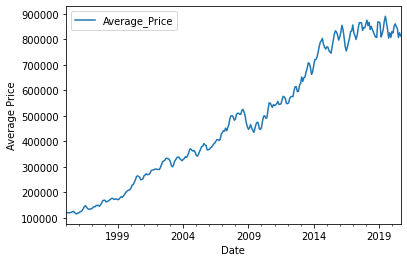

In [26]:
Borough_Prices = df[df['London_Borough'] == 'Camden']

ax = Borough_Prices.plot(kind ='line', x = 'Date', y='Average_Price')

ax.set_ylabel('Average Price')

In [27]:
# create a new column that contains only the year
df['Year'] = df['Date'].map(lambda x: x.strftime('%Y'))

/Users/memanuel0109/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
df

,London_Borough,ID,Date,Average_Price,Year
1,Barking & Dagenham,E09000002,1995-01-01,50460.23,1995
2,Barnet,E09000003,1995-01-01,93284.52,1995
3,Bexley,E09000004,1995-01-01,64958.09,1995
4,Brent,E09000005,1995-01-01,71306.57,1995
5,Bromley,E09000006,1995-01-01,81671.48,1995
...,...,...,...,...,...
13888,Sutton,E09000029,2020-09-01,386214.02,2020
13889,Tower Hamlets,E09000030,2020-09-01,437574.03,2020
13890,Waltham Forest,E09000031,2020-09-01,461726.97,2020
13891,Wandsworth,E09000032,2020-09-01,615802.82,2020


In [29]:
new_df = df.loc[:, ['London_Borough', 'Average_Price', 'Year']]
new_df

,London_Borough,Average_Price,Year
1,Barking & Dagenham,50460.23,1995
2,Barnet,93284.52,1995
3,Bexley,64958.09,1995
4,Brent,71306.57,1995
5,Bromley,81671.48,1995
...,...,...,...
13888,Sutton,386214.02,2020
13889,Tower Hamlets,437574.03,2020
13890,Waltham Forest,461726.97,2020
13891,Wandsworth,615802.82,2020


In [30]:
new_df = df.groupby(['Year', 'London_Borough']).mean()
new_df

Average_Price
Year London_Borough                   
1995 Barking & Dagenham       51817.97
     Barnet                   91792.54
     Bexley                   64291.53
     Brent                    73029.84
     Bromley                  81967.32
...                                ...
2020 Sutton                  375097.44
     Tower Hamlets           453606.29
     Waltham Forest          444393.15
     Wandsworth              603590.27
     Westminster             972354.28

[832 rows x 1 columns]

In [31]:
df = df.pivot_table(index='Year', columns='London_Borough', values='Average_Price')

In [32]:
df

London_Borough,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995,51817.97,91792.54,64291.53,73029.84,81967.32,120367.43,68923.34,81218.67,71984.23,63389.79,66024.48,123238.00,80078.49,83519.49,68281.01,73755.76,72941.17,95555.07,1.93e+05,82838.99,68105.69,58881.77,80500.75,54574.23,72580.49,109892.27,64260.05,70291.30,63652.45,61279.98,88829.08,1.34e+05
1996,51718.19,94000.45,65490.42,75235.92,83547.48,133810.49,69713.92,83389.91,74062.01,65186.78,69247.65,132045.19,84501.25,85926.70,69347.96,75753.42,73886.73,97069.72,2.07e+05,87017.76,72444.21,59886.61,83999.03,55747.01,75358.66,117307.88,70117.31,71651.92,70094.72,62177.24,92270.04,1.39e+05
1997,55974.26,106883.19,70789.41,86749.07,94224.69,150142.90,77674.27,97805.82,83609.44,72067.77,78176.80,151723.24,95429.85,99482.90,76215.40,85947.11,84535.69,115551.86,2.47e+05,99856.85,85904.15,66150.70,95699.21,60971.38,83371.97,136656.27,79725.85,81094.12,85759.56,68228.79,108108.36,1.65e+05
1998,60285.82,122359.47,80632.02,100692.59,108286.52,170688.97,88143.23,111343.15,93030.22,81532.93,87869.54,175340.92,107419.85,114778.25,85602.09,97676.05,99746.07,134148.97,2.68e+05,116399.77,103179.12,75539.05,108049.86,67671.27,94514.40,162956.07,91405.19,92087.05,96505.17,75557.47,125406.81,1.91e+05
1999,65320.93,136004.51,86777.72,112157.47,120874.18,191090.70,97173.32,126278.34,101986.99,90879.13,105532.97,198901.18,120083.46,126687.58,92889.34,108925.42,112073.66,155589.74,3.11e+05,129697.04,116616.29,84695.14,121901.37,74525.57,102940.45,181772.32,110267.55,100869.81,113035.29,83821.59,145339.81,2.14e+05
2000,77549.51,167952.63,103186.67,140962.50,147826.71,247114.63,118777.30,153309.28,121839.21,110162.98,132727.51,247266.22,145997.09,152494.29,109432.77,131432.24,136624.86,192634.09,3.77e+05,162805.83,148038.78,107082.68,151605.43,92887.33,124379.14,227866.16,142266.73,125952.05,141287.78,103030.68,184275.84,2.60e+05
2001,88664.06,185563.35,116527.13,157287.40,162131.84,278594.04,132509.21,170190.62,135713.17,125820.07,153406.32,271918.78,165127.04,170250.17,124071.40,145293.69,153622.97,219818.40,4.20e+05,178822.59,164684.74,121333.17,167046.24,108763.06,141587.53,241333.29,164486.25,137910.19,162505.94,118843.46,205179.66,2.96e+05
2002,112221.91,220746.06,136797.96,185898.15,186646.04,314179.51,157022.77,198426.77,159791.07,147421.51,180269.46,302459.06,195801.26,202680.88,149065.94,172147.04,175132.16,247761.22,4.60e+05,203104.90,190451.03,143764.03,195714.69,137455.64,169368.11,271689.37,184684.20,162526.66,187288.51,148137.48,232805.56,3.40e+05
2003,142498.93,251212.93,164482.04,216501.76,215992.97,323053.85,185784.03,221689.17,190572.74,171042.62,201071.48,318805.69,220320.07,232598.35,179117.78,202707.81,198261.23,262085.29,4.60e+05,228280.49,203377.22,170885.74,220394.19,168437.52,203571.97,294167.99,199583.84,187815.76,207901.58,175075.87,253342.48,3.63e+05


In [33]:
# Performed an index to confirm it corresponds with my pivot table
df['Camden']['2020']

833784.8049333333

In [34]:
def create_price_ratio(x):
    
    Y2000 = x['1998']
    Y2020 = x['2018']
    
    Price_Ratio = Y2020/Y2000
    
    return Price_Ratio

In [35]:
# checked to make sure the function works
create_price_ratio(df['Camden'])

4.935353408884261

In [36]:
final = []

for index, column in enumerate(df):
    
    results = create_price_ratio(df[column])
    
    final.append([column, results])
            
print(final)

[['Barking & Dagenham', 4.89661861291754], ['Barnet', 4.358195917538044], ['Bexley', 4.248977046127877], ['Brent', 4.8945544971392865], ['Bromley', 4.0947846853338765], ['Camden', 4.935353408884261], ['Croydon', 4.201100280024767], ['Ealing', 4.311450902121834], ['Enfield', 4.26347158349581], ['Greenwich', 4.763036347329193], ['Hackney', 6.198285561008662], ['Hammersmith & Fulham', 4.137798101936229], ['Haringey', 5.134624964136042], ['Harrow', 4.0591964329643195], ['Havering', 4.325230371335308], ['Hillingdon', 4.2002730803844575], ['Hounslow', 3.976409106143329], ['Islington', 4.844048012802298], ['Kensington & Chelsea', 5.082465066092464], ['Kingston upon Thames', 4.270549521484271], ['Lambeth', 4.957751163514063], ['Lewisham', 5.449221041059685], ['Merton', 4.741273313294604], ['Newham', 5.305390437201879], ['Redbridge', 4.471182006097364], ['Richmond upon Thames', 4.005161895721457], ['Southwark', 5.516485302379376], ['Sutton', 4.118522608573157], ['Tower Hamlets', 4.6267010400611

In [37]:
final_df = pd.DataFrame(final)

In [38]:
final_df

,0,1
0,Barking & Dagenham,4.90
1,Barnet,4.36
2,Bexley,4.25
3,Brent,4.89
4,Bromley,4.09
5,Camden,4.94
6,Croydon,4.20
7,Ealing,4.31
8,Enfield,4.26
9,Greenwich,4.76


In [39]:
final_df.columns = ['Borough', 'Price_Ratio']

In [40]:
final_df.set_index('Borough', inplace=True)

In [41]:
final_df

,Price_Ratio
Borough,
Barking & Dagenham,4.90
Barnet,4.36
Bexley,4.25
Brent,4.89
Bromley,4.09
Camden,4.94
Croydon,4.20
Ealing,4.31
Enfield,4.26


In [42]:
final_sorted_df = final_df.sort_values(['Price_Ratio'], ascending=True)

In [43]:
print(final_sorted_df)

                      Price_Ratio
Borough                          
Hounslow                     3.98
Richmond upon Thames         4.01
Harrow                       4.06
Bromley                      4.09
Sutton                       4.12
Hammersmith & Fulham         4.14
Hillingdon                   4.20
Croydon                      4.20
Bexley                       4.25
Enfield                      4.26
Kingston upon Thames         4.27
Ealing                       4.31
Havering                     4.33
Barnet                       4.36
Redbridge                    4.47
Tower Hamlets                4.63
Merton                       4.74
Wandsworth                   4.76
Greenwich                    4.76
Islington                    4.84
Brent                        4.89
Barking & Dagenham           4.90
Camden                       4.94
Lambeth                      4.96
Kensington & Chelsea         5.08
Haringey                     5.13
Newham                       5.31
Westminster   

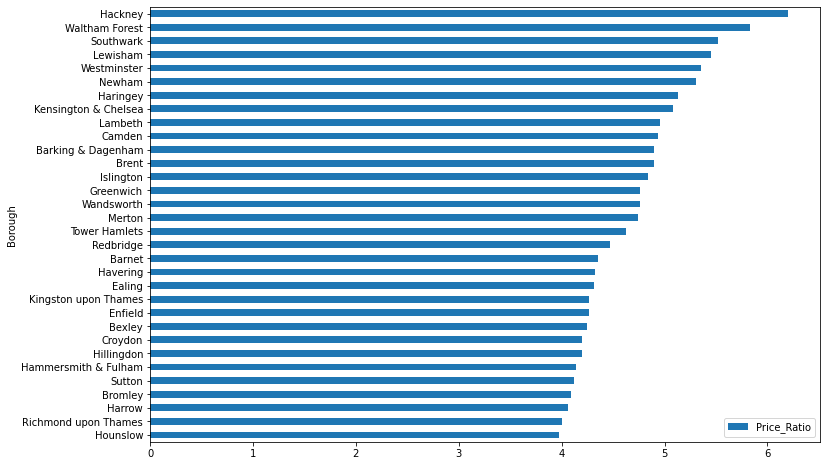

In [44]:
ax = final_sorted_df.plot(kind ='barh', figsize=(12,8))
plt.savefig('../figures/results.png')